## Excercise 8-1: Wait Times at Bus Stand
This excercise ask us to predict the bus time when the buses are coming 5/10 mins interval. As a passenger, we would like to understand the wait times. this could go up 

If we arrive at a random time during a 5 minute gap, y is uniform from 0 to 5 minutes.If we arrive during a 10 minute gap, y is uniform from 0 to 10. So the overall distribution is a mixture of uniform distributions weighted according to the probability of each gap.

to start with, I have created a list of gap times of bus arrival which we assume true or really happened. I increased that observation times N times ( in this case 200 times). In other words, let's say I go to the bus statation on daily basis and this is what happpened for 200 times. 

Then I assigned a uniform probabbility. 

Because we dont when the bus will arrive the distribution must be mixed with diffferent bounds. this is what happenes later in the PmfOfWaitTime. 

Once the observations are received, I have computed CDF with Scale distribution to every minute. To Do that, I have taken raw CDFs and Scaled them to fit our visualization.

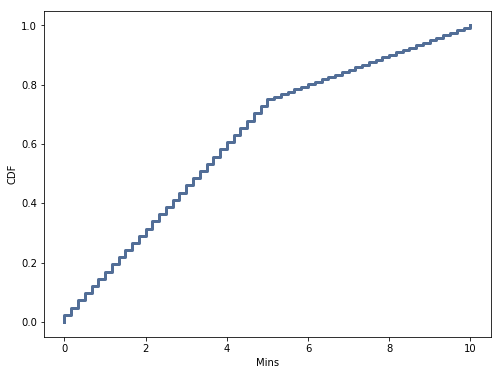

In [60]:
import thinkbayes2
import thinkplot

OBSERVED_GAP_TIMES = [300,600,300,600,300,300,600,600,300,600,600,600,600,300,300,300,300,300,600,600,600,600,300]

def PmfOfWaitTime(pmf):
    metapmf = thinkbayes2.Pmf()
    for gap, prob in pmf.Items():
        uniform = MakeUniformPmf(0, gap)
        metapmf.Set(uniform, prob)

    pmf_y = thinkbayes2.Pmf();

    for pmf, p1 in metapmf.Items(): 
        for x, p2 in pmf.Items():
            pmf_y[x] += p1 * p2
    pmf_y.Normalize();
    return pmf_y

def MakeUniformPmf(low, high):
    upmf = thinkbayes2.Pmf()
    for x in MakeRange(low=low, high=high):
        upmf.Set(x, 1)
    upmf.Normalize()
    return upmf

def MakeRange(low, high, skip=10):
    return range(low, high+skip, skip)

def BiasPmf(pmf):
    new_pmf = pmf.Copy()

    for x, p in pmf.Items():
        new_pmf.Mult(x, x)

    new_pmf.Normalize()
    return new_pmf

def ScaleDists(dists, factor):
    """Scales each of the distributions in a sequence.
    dists: sequence of Pmf or Cdf
    factor: float scale factor
    """
    return [dist.Scale(factor) for dist in dists]

def main():
    
    n = 200
    
    cdf_z = thinkbayes2.MakeCdfFromList(OBSERVED_GAP_TIMES)
    sample_z = cdf_z.Sample(n)
    pmf_z = thinkbayes2.MakePmfFromList(sample_z)
    
    #BiasPmf(pmf_z);
    
    waitpmf = PmfOfWaitTime(pmf_z);

    cdf_z1 = waitpmf.MakeCdf();
  

    cdfs = ScaleDists([cdf_z1], 1.0/60)

    thinkplot.Cdfs(cdfs)
    
    thinkplot.Show(xlabel= 'Mins' , ylabel= 'CDF');


if __name__ == '__main__':
    main()